In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum07/data/stock_dataset.csv', sep=',', engine='python')
df.columns = df.columns.str.strip()
df.head()


,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


In [16]:
df.describe()

/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarni

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7006.000000,7006.000000,...,7347.000000,7262.000000,7194.000000,7262.000000,7194.000000,7194.000000,7566.000000,7626.000000,7626.000000,7781.000000
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,46.966016,49.898659,...,37.947291,18.673824,18.704812,18.673824,18.704812,0.298413,inf,-0.259186,-2.674224,0.183010
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,8.760961,3.420371,...,107.340294,75.723295,74.210933,75.723295,74.210933,14.661948,NaN,7.334250,268.268134,0.386699
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,0.510000,-668.212635,-626.263336,-668.212635,-626.263336,-211.219037,0.000000,-90.538818,-23399.465955,0.000000
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,40.954487,48.266978,...,4.565000,6.153839,8.336837,6.153839,8.336837,-6.585432,0.637237,-0.417873,-4.494383,0.000000
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,46.459477,48.961162,...,10.640000,28.484828,28.478797,28.484828,28.478797,0.000000,1.000000,-0.025000,-0.304004,0.000000
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,52.289893,50.527067,...,25.170000,59.688404,58.664021,59.688404,58.664021,6.726947,1.655385,0.240000,2.812552,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,198.156313,inf,120.256775,425.000000,1.000000


In [17]:
print("Jumlah data:", len(df))
print("Nama kolom:", df.columns.tolist())
print(df.head())

Jumlah data: 7781
Nama kolom: ['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker', 'RSIadjclose15', 'RSIvolume15', 'RSIadjclose25', 'RSIvolume25', 'RSIadjclose50', 'RSIvolume50', 'MACDadjclose15', 'MACDvolume15', 'MACDadjclose25', 'MACDvolume25', 'MACDadjclose50', 'MACDvolume50', 'MACDsig-adjclose-15', 'MACDdif-adjclose-15-0', 'MACDdif-adjclose-15-1', 'MACDdif-adjclose-15-2', 'MACDdif-adjclose-15-3', 'MACDsig-volume-15', 'MACDdif-volume-15-0', 'MACDdif-volume-15-1', 'MACDdif-volume-15-2', 'MACDdif-volume-15-3', 'MACDsig-adjclose-25', 'MACDdif-adjclose-25-0', 'MACDdif-adjclose-25-1', 'MACDdif-adjclose-25-2', 'MACDdif-adjclose-25-3', 'MACDsig-volume-25', 'MACDdif-volume-25-0', 'MACDdif-volume-25-1', 'MACDdif-volume-25-2', 'MACDdif-volume-25-3', 'MACDsig-adjclose-50', 'MACDdif-adjclose-50-0', 'MACDdif-adjclose-50-1', 'MACDdif-adjclose-50-2', 'MACDdif-adjclose-50-3', 'MACDsig-volume-50', 'MACDdif-volume-50-0', 'MACDdif-volume-50-1', 'MACDdif-volume-50-2', 'MACDdif-volum

In [29]:
X = df[['MACDhistvolume50']]
y = df['MACDhistadjclose50']

X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [35]:
print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Koefisien: {model.coef_[0]:.4f}")


Mean Squared Error (MSE): 3.5176
R² Score: -0.0016
Intercept: 0.1091
Koefisien: -0.0000


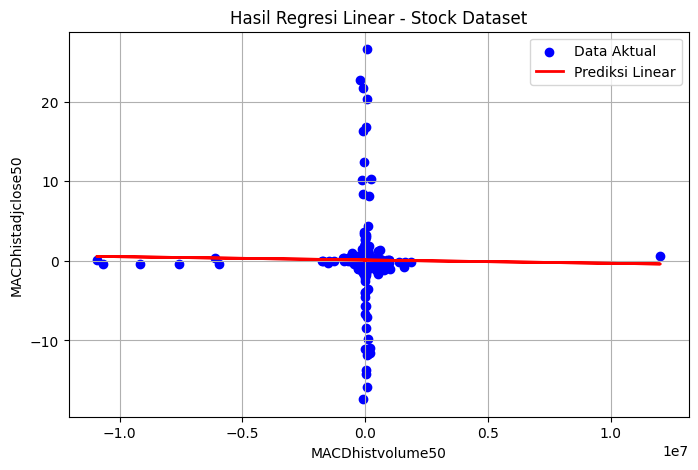

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Data Aktual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediksi Linear')
plt.title('Hasil Regresi Linear - Stock Dataset')
plt.xlabel('MACDhistvolume50')
plt.ylabel('MACDhistadjclose50')
plt.legend()
plt.grid(True)
plt.show()

